Dataset saved to patient_data.csv
Dataset saved to anomaly_data.csv


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Epoch 1/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.8785 - loss: 0.4982 - val_accuracy: 1.0000 - val_loss: 0.0227
Epoch 2/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 1.0000 - loss: 0.0089 - val_accuracy: 1.0000 - val_loss: 3.8914e-04
Epoch 3/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 1.0000 - loss: 2.8698e-04 - val_accuracy: 1.0000 - val_loss: 1.7098e-04
Epoch 4/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 1.0000 - loss: 1.4033e-04 - val_accuracy: 1.0000 - val_loss: 1.3054e-04
Epoch 5/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 1.0000 - loss: 1.0898e-04 - val_accuracy: 1.0000 - val_loss: 1.0474e-04
Epoch 6/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 1.0000 - loss: 9.0365e-05 - val_accuracy: 1.0000 - val_loss: 8.3914e-05
Epoch 7/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 1.0000 - loss: 7.5502e-05 - val_accuracy: 1.0000 - val_loss: 6.7825e-05
Epoch 8/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 1.0000 - 

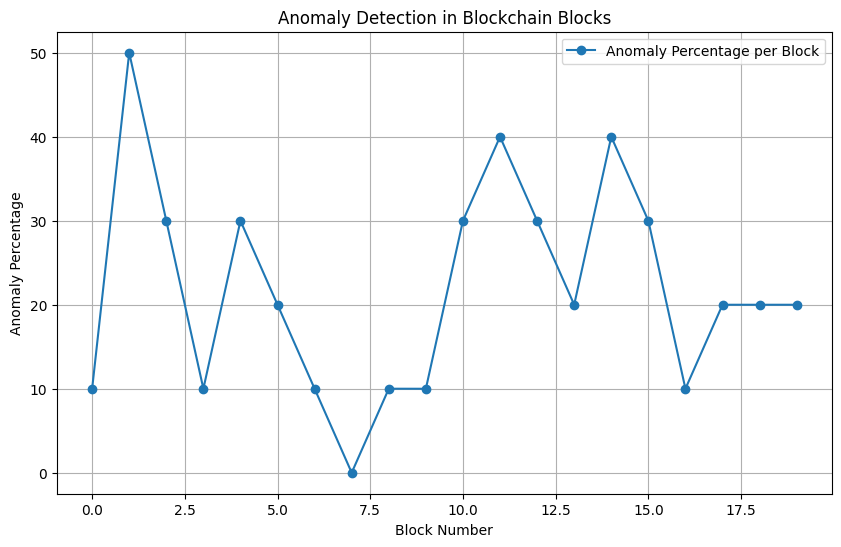

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import hashlib
import random
import os

# Generate synthetic patient data
def generate_patient_data(num_samples=800, num_features=20):
    data = np.random.randn(num_samples, num_features)
    labels = np.zeros(num_samples)  # Normal data labeled as '0'
    return data, labels

# Generate synthetic anomaly data
def generate_anomaly_data(num_samples=200, num_features=20):
    data = np.random.randn(num_samples, num_features) + 5  # Shifted to simulate anomalies
    labels = np.ones(num_samples)  # Anomalies labeled as '1'
    return data, labels

# Save datasets to CSV files
def save_to_csv(data, labels, filename):
    df = pd.DataFrame(data)
    df['Label'] = labels
    df.to_csv(filename, index=False)
    print(f"Dataset saved to {filename}")

# Preprocess the data (scaling and train-test split)
def preprocess_data(data, labels):
    scaler = StandardScaler()
    scaled_data = scaler.fit_transform(data)
    X_train, X_test, y_train, y_test = train_test_split(scaled_data, labels, test_size=0.2, random_state=42)
    return X_train, X_test, y_train, y_test

# Define a simple CNN model for anomaly detection
def create_cnn_model(input_shape):
    model = tf.keras.Sequential([
        tf.keras.layers.InputLayer(input_shape=input_shape),
        tf.keras.layers.Reshape((input_shape[0], 1, 1)),
        tf.keras.layers.Conv2D(32, (1, 3), activation='relu', padding='same'),
        tf.keras.layers.MaxPooling2D((1, 2), padding='same'),
        tf.keras.layers.Conv2D(64, (1, 3), activation='relu', padding='same'),
        tf.keras.layers.MaxPooling2D((1, 2), padding='same'),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Blockchain proof of work simulation
class Blockchain:
    def __init__(self, difficulty=4):
        self.chain = []
        self.difficulty = difficulty
        self.pending_transactions = []

    def mine_block(self, previous_hash):
        nonce = 0
        while True:
            block_data = str(self.pending_transactions) + str(previous_hash) + str(nonce)
            block_hash = hashlib.sha256(block_data.encode()).hexdigest()
            if block_hash[:self.difficulty] == '0' * self.difficulty:
                self.pending_transactions = []
                return {'previous_hash': previous_hash, 'transactions': self.pending_transactions, 'nonce': nonce, 'hash': block_hash}
            nonce += 1

    def add_transaction(self, transaction):
        self.pending_transactions.append(transaction)

# Simulate anomaly detection in blockchain blocks
def simulate_blockchain_anomaly_detection(data, labels, model):
    blockchain = Blockchain(difficulty=4)
    previous_hash = '0' * 64

    anomaly_detection_results = []
    for i in range(0, len(data), 10):  # Simulate 10 transactions per block
        block_data = data[i:i+10]
        predictions = model.predict(block_data)
        anomalies_in_block = np.mean(predictions)

        blockchain.add_transaction(block_data.tolist())
        mined_block = blockchain.mine_block(previous_hash)

        anomaly_detection_results.append({'block_number': len(blockchain.chain),
                                          'anomaly_percentage': anomalies_in_block * 100})
        previous_hash = mined_block['hash']

    return anomaly_detection_results

# Visualization function
def visualize_results(results):
    anomaly_percentages = [result['anomaly_percentage'] for result in results]
    plt.figure(figsize=(10, 6))
    plt.plot(anomaly_percentages, marker='o', label="Anomaly Percentage per Block")
    plt.title("Anomaly Detection in Blockchain Blocks")
    plt.xlabel("Block Number")
    plt.ylabel("Anomaly Percentage")
    plt.legend()
    plt.grid(True)
    plt.show()

# Save results to CSV
def save_results_to_csv(results, filename):
    df = pd.DataFrame(results)
    df.to_csv(filename, index=False)
    print(f"Results saved to {filename}")

# Main simulation pipeline
def run_simulation():
    # Generate datasets
    patient_data, patient_labels = generate_patient_data()
    anomaly_data, anomaly_labels = generate_anomaly_data()

    # Save datasets to CSV
    save_to_csv(patient_data, patient_labels, "patient_data.csv")
    save_to_csv(anomaly_data, anomaly_labels, "anomaly_data.csv")

    # Combine datasets
    data = np.vstack((patient_data, anomaly_data))
    labels = np.hstack((patient_labels, anomaly_labels))

    # Preprocess the data
    X_train, X_test, y_train, y_test = preprocess_data(data, labels)

    # Create and train the CNN model
    model = create_cnn_model((X_train.shape[1], 1))
    model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

    # Simulate blockchain mining with anomaly detection
    results = simulate_blockchain_anomaly_detection(X_test, y_test, model)

    # Save and visualize results
    save_results_to_csv(results, "simulation_results.csv")
    visualize_results(results)

# Run the simulation
run_simulation()
